# Сборный проект — Анализ продаж интернет-магазина «Стримчик»

<a></a><font size="4"><b>Описание проекта</b></font><br/>

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года, мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<a></a><font size="4"><b>Задача</b></font><br/>

- Провести подготовку данных к анализу
- Провести исследовательский анализ данных
- Составить портрет пользователя каждого региона
- Проверить гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


<a></a><font size="4"><b>План работы:</b></font><br/> 


**Шаг 1. Откроем файл с данными и изучим общую информацию**
- Откроем и изучим файл
- Определим и изучим пропущенные значения и типы данных

**Шаг 2. Проведем предобработку данных**
- Заменим названия столбцов (приведем к нижнему регистру);
- Преобразуем данные в нужные типы. Опишим, в каких столбцах заменили тип данных и почему;
- Обработаем пропуски при необходимости:
    - объясним, почему заполнили пропуски определенным образом или почему не стали это делать;
    - опишем причины, которые могли привести к пропускам;
    - обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишим, как его обработать;
- Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.


**Шаг 3. Проведем исследовательский анализ данных**
- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмем данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составим портрет пользователя каждого региона**
- Определим для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишим различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясним разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверим гипотезы**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Зададим пороговое значение alpha.
- Поясним:
    - Как сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.
 
**Шаг 6. Напишем общий вывод**



<a></a><font size="4"><b>Описание данных</b></font><br/>

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

## Обзор данных.

In [10]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [11]:
# чтение файла с данными и сохранение в data
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [12]:
# получение первых 10 строк 
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [13]:
# получение общей информации о данных
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [14]:
#посмотрим есть ли дубликаты в датафрейме
print('Количество дубликатов:', games.duplicated().sum())

Количество дубликатов: 0


In [15]:
# выявление аномалий в данных
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [16]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [17]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Процент пропущенных значений' + "\n", fontsize = 22)    
        );    
    except:
        print('пропусков не осталось :) ')
        

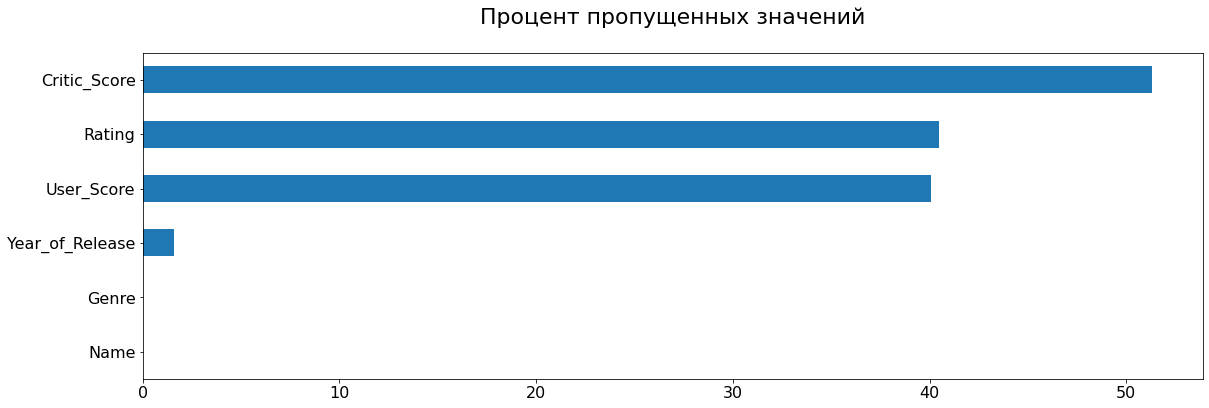

In [18]:
pass_value_barh(games)

## Предобработка данных

### Замена названия столбцов

In [19]:
# приведем к нижнему регистру
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Удаление пропусков и изменение типов данных

In [20]:
games['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [21]:
games[games['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [22]:
games['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [23]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [24]:
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [25]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [26]:
#tbd мешает приведению к точке с плавающей запятой, посмотрим подробнее
print('Количество строк с tbd:', games[games['user_score'] == 'tbd']['user_score'].count())

Количество строк с tbd: 2424


В 6 столбцах есть пустые ячейки. Приступим к изучению.

- столбец `name` отвечает за название компьютерной игры, непонятно о какой видеоигре идет речь, поэтому мы принимаем решение удалить эти 2 строки. На счет появления пропуска в данном столбце можно сказать, что или его забыли указать при заведении данных или могла возникнуть ошибка при выгрузке данных.

- в столбцах `critic_score`, `user_score` довольно много пропущенных значений и поэтому мы рассчитаем медиану по конкретной игре, если она упоминается более 2-х раз. Причиной отсутствия рейтинга может быть просто отсутствие оценок: игра непопулярная или недавно вышедшая и еще не получила свои оценки.

- со столбцом `year_of_release` есть названия игр с указанием года выпуска и в итоге будет выглядеть не совсем логично (на примере `Madden NFL 2004` и год не указан.) Поэтому предлагаю удалить пропуска, чтобы не было нелогичного установления года выпуска. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре забыли указать или точная дата выхода игры точно не определена.

- столбец `genre` так же сложно подвести к какому-либо значению, т.к. необходимо знать конкретную игру. Так же удаляем строки с пустыми значениями. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре его забыли указать или не определились к какому именно жанру относится видеоигра.

- в столбеце `rating` много пропусков около 40%, мы не сможем понять возрастное ограничение, поэтому поставим маркер `unknown`


Итак, что нужно сделать:
- удалить строки с пропусками в столбцах: `name`, `year_of_release`, `genre`, т.к. доля прорушенных значений менее 2%
- `year_of_release` приведем к типу `int`
- заполнить пропуски в `rating` на `unknown`
- `user_score` это оценка пользователей (максимум 10), тип данных должен быть float, но есть значение tbd, которое мешает приведению к точке с плавающей запятой. Поэтому предлагаю значение tbd изменить на маркер `-1`
- пропуски в столбцах `critic_score`, `user_score` оставшиеся пропуски заполним маркером `-1`

In [27]:
#удалить строки с пропусками в столбцах: name, year_of_release, genre
games = games.dropna(subset=['name', 'year_of_release', 'genre'])

#year_of_release приведем к типу int
games['year_of_release'] = games['year_of_release'].astype('int')

#заполнить пропуски в rating на unknown 
games['rating'] = games['rating'].fillna('unknown')

#значение tbd изменить на маркер `-1` и изменим тип данных
games['user_score'] = games['user_score'].replace('tbd', -1)
games['user_score'] = games['user_score'].astype('float')


In [28]:
p1 = games['user_score'].isna().sum()
p2 = games['critic_score'].isna().sum()
print('Количество пропусков в user_score:', p1)
print('Количество пропусков в critic_score:', p2)

Количество пропусков в user_score: 6605
Количество пропусков в critic_score: 8461


In [29]:
# заполняем столбцы critic_score, user_score медианой по конкртетной игре, если это игра встречается более 2-х раз
df = games[['name', 'user_score', 'critic_score']].value_counts('name')
df = df[df > 2]

for i in df.index:
    median_user_score = games.loc[(games['name'] == i) & (games['user_score'].notna()), 'user_score'].median()
    median_critic_score = games.loc[(games['name'] == i) & (games['critic_score'].notna()), 'critic_score'].median()
    if median_user_score > 0:
        games.loc[(games['name'] == i) & (games['user_score'].isna()), 'user_score'] = median_user_score
    if median_critic_score > 0:
        games.loc[(games['name'] == i) & (games['critic_score'].isna()), 'critic_score'] =  median_critic_score  
        
print('заполнили медианой в user_score:', p1 - games['user_score'].isna().sum())
print('заполнили медианой  в critic_score:', p2 - games['critic_score'].isna().sum())


заполнили медианой в user_score: 204
заполнили медианой  в critic_score: 709


In [30]:
# остальные пропуски в столбцах critic_score, user_score заполним маркером -1
games.loc[games['critic_score'].isna(), 'critic_score'] = -1
games.loc[games['user_score'].isna(), 'user_score'] = -1
# проверяем количество пропусков после удаления
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [31]:
games['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

### Суммарные продажи во всех регионах

In [32]:
#посчитаем суммарные продажи во всех регионах
games['total_sales'] =  games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

#проверим
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unknown,28.31


In [33]:
#Проверка
(
    games[['total_sales']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)

,total_sales
count,"16,444.00"
min,0.00
max,82.54
median,0.17
mean,0.54


In [34]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Вывод**
- Привели к нижнему регистру название столбцов
- Удалили 271 строки с пропусками в столбцах: `name`, `year_of_release`, `genre`. Это около 1.6% от всех данных
- Изменили тип данных `year_of_release` на `int`
- Заполнили пропуски в `rating` на `unknown`
- В `user_score` значение tbd изменили на маркер `-1`,
- Изменили тип данных `user_score` на `float`
- Заполнили пропуски в  `critic_score`, `user_score` медианой по конкртетной игре, если это игра встречается более 2-х раз
- Остальные пропуски в `critic_score`, `user_score` заполнили маркером `-1`
- Посчитали суммарные продажи во всех регионах

## Исследовательский анализ данных

### Количество игр выпущенных в разные годы
- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

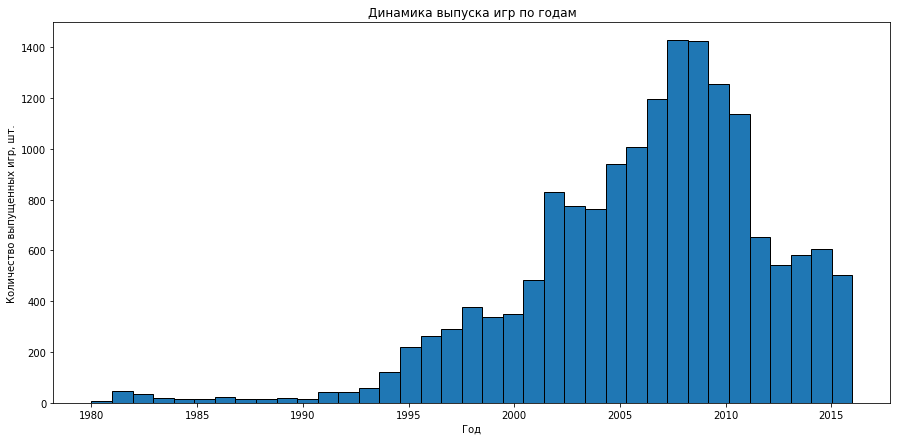

In [35]:
# подсчёт количества игр за каждый год по всем платформам

games['year_of_release'].plot(kind='hist', bins=37, figsize=(15, 7), ec='black')
plt.title('Динамика выпуска игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр, шт.');

- 80-ые — зарождение игровой индустрии
- с 95-года — активный рост
- с 2010 года — спад, насыщение рынка, переход на мобильные платформы

### Динамика продаж по платформам. Распределение по годам.
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

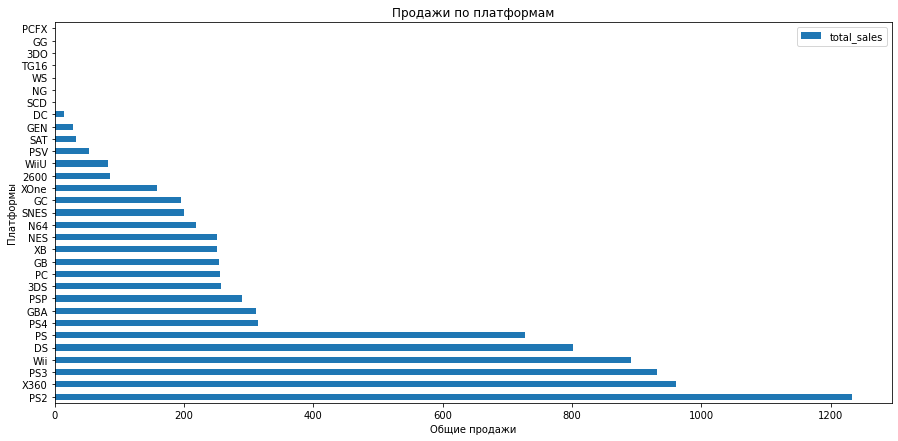

In [36]:
# подсчёт количества игр за каждый год по всем платформам

platform_sales = (
    games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales',  ascending=False)
    .astype('int')
    
)
platform_sales.plot(kind='barh', figsize=(15, 7))
plt.title('Продажи по платформам')
plt.xlabel('Общие продажи')
plt.ylabel('Платформы');

Рассмотрим первую шестерку платформ по годам

In [37]:
platform_sales[:6]

,total_sales
platform,
PS2,1233
X360,961
PS3,931
Wii,891
DS,802
PS,727


In [38]:
list_platform = []
for i in platform_sales.index[:6]:
    list_platform.append(i)
list_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

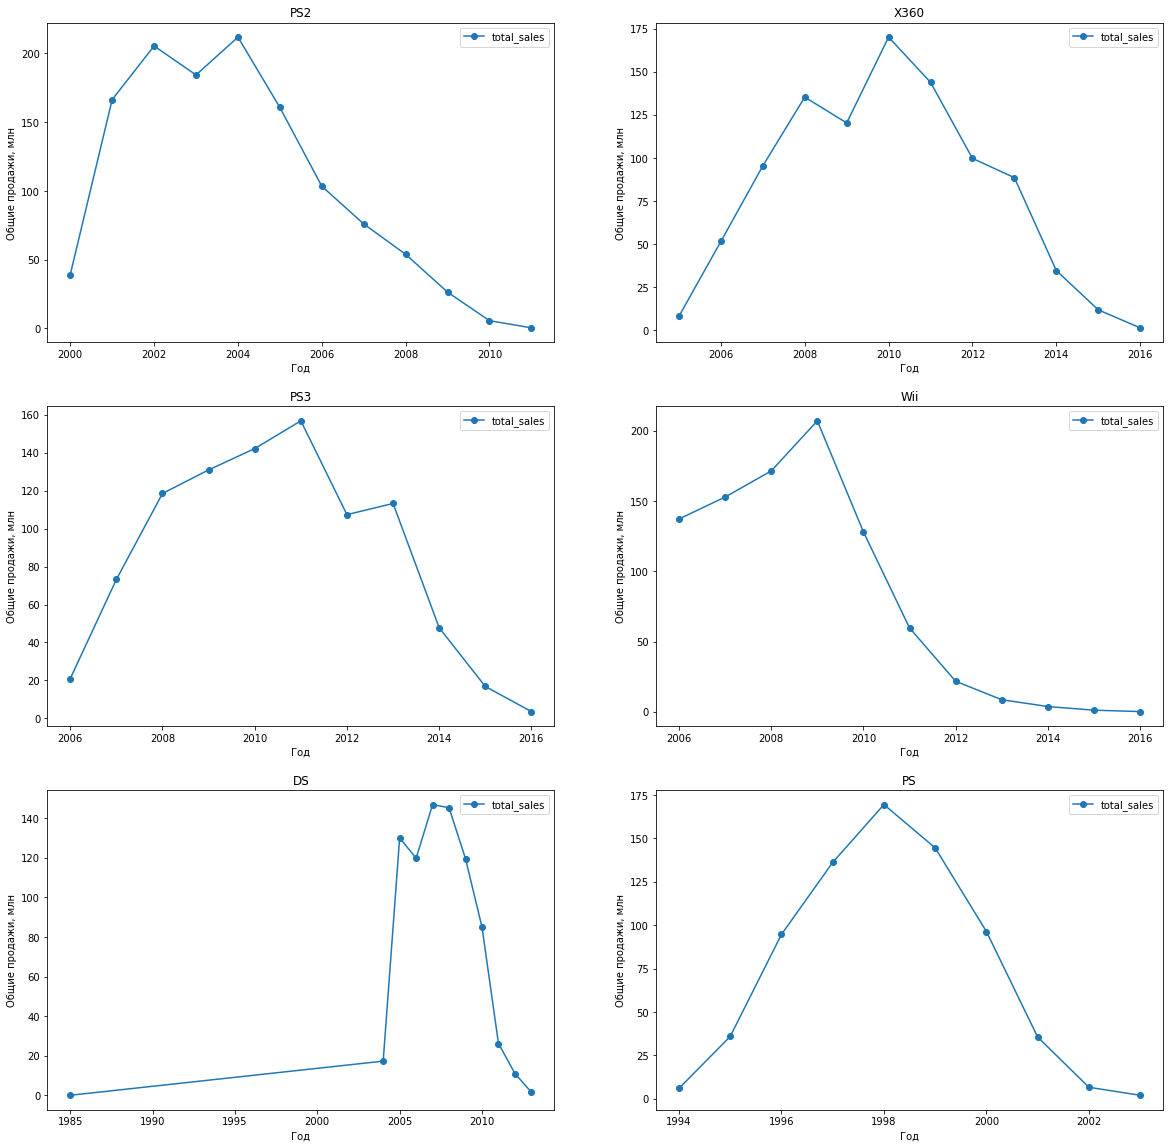

In [39]:
row = 3
col = 2

fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(20,20))
count = 0
for r in range(row):
    for c in range(col):
        (games[games['platform'] == list_platform[count]]
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(style='o-',
              ax=axes[r,c], 
              title=list_platform[count], 
              xlabel='Год', 
              ylabel='Общие продажи, млн')
        )
        count +=1

**Вывод**
- `PS2` — 2000-2011 (12 лет)
- `X360` — 2005-2016 (12 лет)
- `PS3` — 2006-2016 (11 лет)
- `Wii` — 2006-2016 (11 лет)
- `DS` — 1985-2013 (11 лет)
- `PS` — 1994-2003 (10 лет)

Таким образом, в среднем консоль живет около 10 лет. И жила бы больше, если б не выходили более новые консоли. Но это неизбежно, т.к. прогресс идет вперед и старые платформы перестают отвечать техническим требованиям новых игр.


### Определение актуального периода
- Возьмем данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не будем учитывайть в работе данные за предыдущие годы.

Актуальным периодом по продажам считаю с 2014 по 2016 год (3 года)


In [42]:
actual_games = games.query('year_of_release >= 2014')

In [43]:
games_2016 = games.query('year_of_release >= 2016')

### Потенциально прибыльные платформы
- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

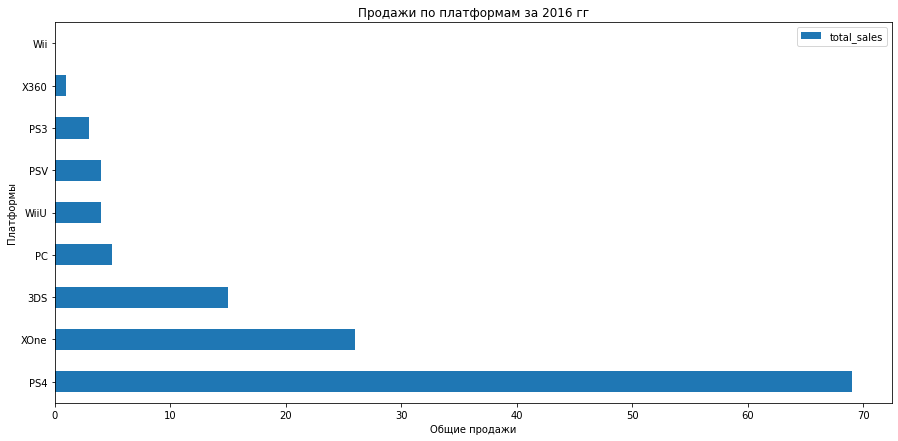

In [44]:
# найдем лидеров продаж за 2016 год

platform_sales = (
    games_2016
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales',  ascending=False)
    .astype('int')
    
)
platform_sales.plot(kind='barh', figsize=(15, 7))
plt.title('Продажи по платформам за 2016 гг')
plt.xlabel('Общие продажи')
plt.ylabel('Платформы');

In [45]:
#Сохраним название этих платформ в отдельный список.
platform_2016 = []
for i in platform_sales.index:
    platform_2016.append(i)
platform_2016

['PS4', 'XOne', '3DS', 'PC', 'WiiU', 'PSV', 'PS3', 'X360', 'Wii']

In [49]:
(
    actual_games.query('platform in @platform_2016')
    .groupby(['year_of_release','platform'])
    .sum()['total_sales']
    .unstack()
)

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


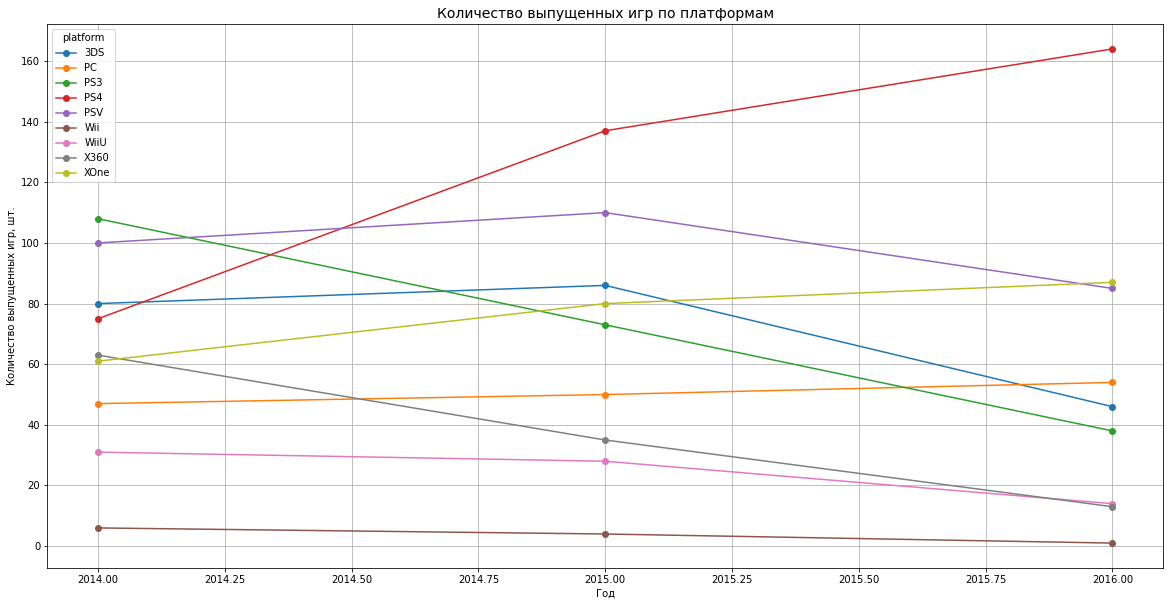

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
(actual_games.query('platform in @platform_2016')
     .groupby(['year_of_release','platform']).count()['total_sales']
     .unstack()
     .plot(style='o-', ax=ax, grid=True)
    )
plt.title('Количество выпущенных игр по платформам', size=14)
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр, шт.');

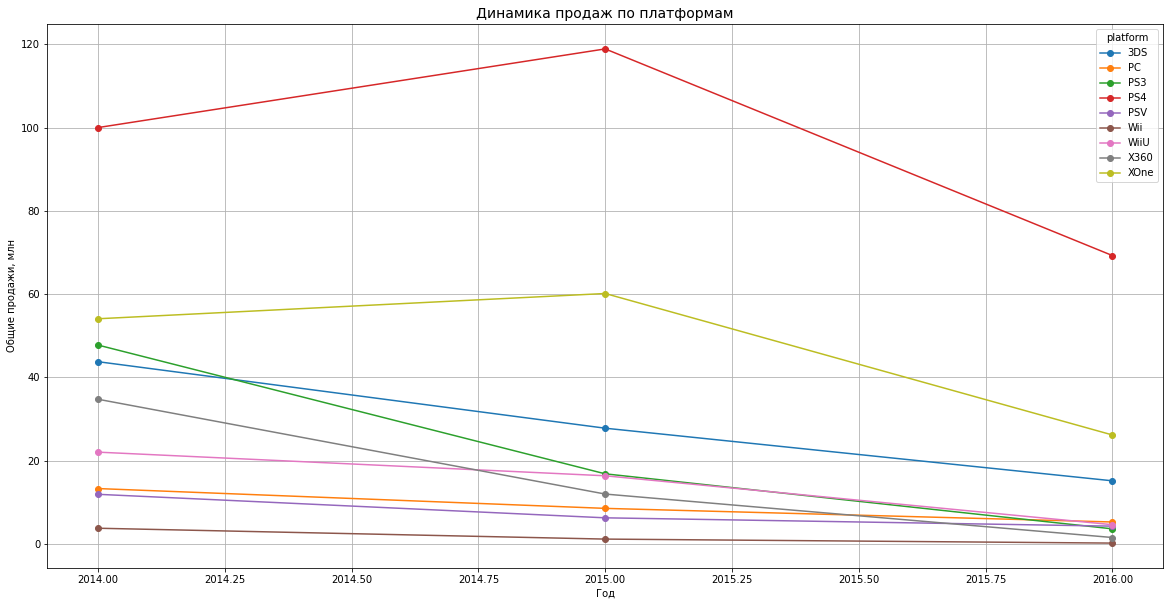

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
(actual_games.query('platform in @platform_2016')
     .groupby(['year_of_release','platform']).sum()['total_sales']
     .unstack()
     .plot(style='o-', ax=ax, grid=True)
    )
plt.title('Динамика продаж по платформам', size=14)
plt.xlabel('Год')
plt.ylabel('Общие продажи, млн');

Наблюдаем, что по ряду платформ выпуск игр сокращается, кроме платформ - PS4 и XOne, выпуск игр к которым начался в 2013 году и на протяжении 3 лет демонстрирует пололжительную тенденцию  (заменяют предыдущее поколение игровых приставок), но при этом объем продаж снизился почти в 2 раза в 2016 году, также  можно заметить небольшой прирост количества выпускаемых игр у PC.

**Вывод**

- Топ 6 потенциально прибыльных платформ на 2017г.: PS4, XOne, 3DS, PSV, PC, WiiU
- На убыль идут приставки предыдущего поколения PS3, X360, Wii соотвественно.


### График «ящик с усами» по глобальным продажам игр в разбивке по платформам
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.

In [52]:
top_list = ['PS4', 'XOne', '3DS', 'PSV', 'PC', 'WiiU']
(
    actual_games.query('platform in @top_list')
    .groupby(['platform']).sum()['total_sales'].sort_values()
)

platform
PSV      22.40
PC       27.05
WiiU     42.98
3DS      86.68
XOne    140.36
PS4     288.15
Name: total_sales, dtype: float64

In [53]:
actual_games[['critic_score', 'user_score', 'total_sales']].describe()

,critic_score,user_score,total_sales
count,1689.000000,1689.000000,1689.000000
mean,40.177620,3.255536,0.431883
std,37.712814,3.973408,1.056109
min,-1.000000,-1.000000,0.010000
25%,-1.000000,-1.000000,0.030000
50%,58.000000,4.300000,0.100000
75%,76.000000,7.100000,0.350000
max,97.000000,9.300000,14.630000


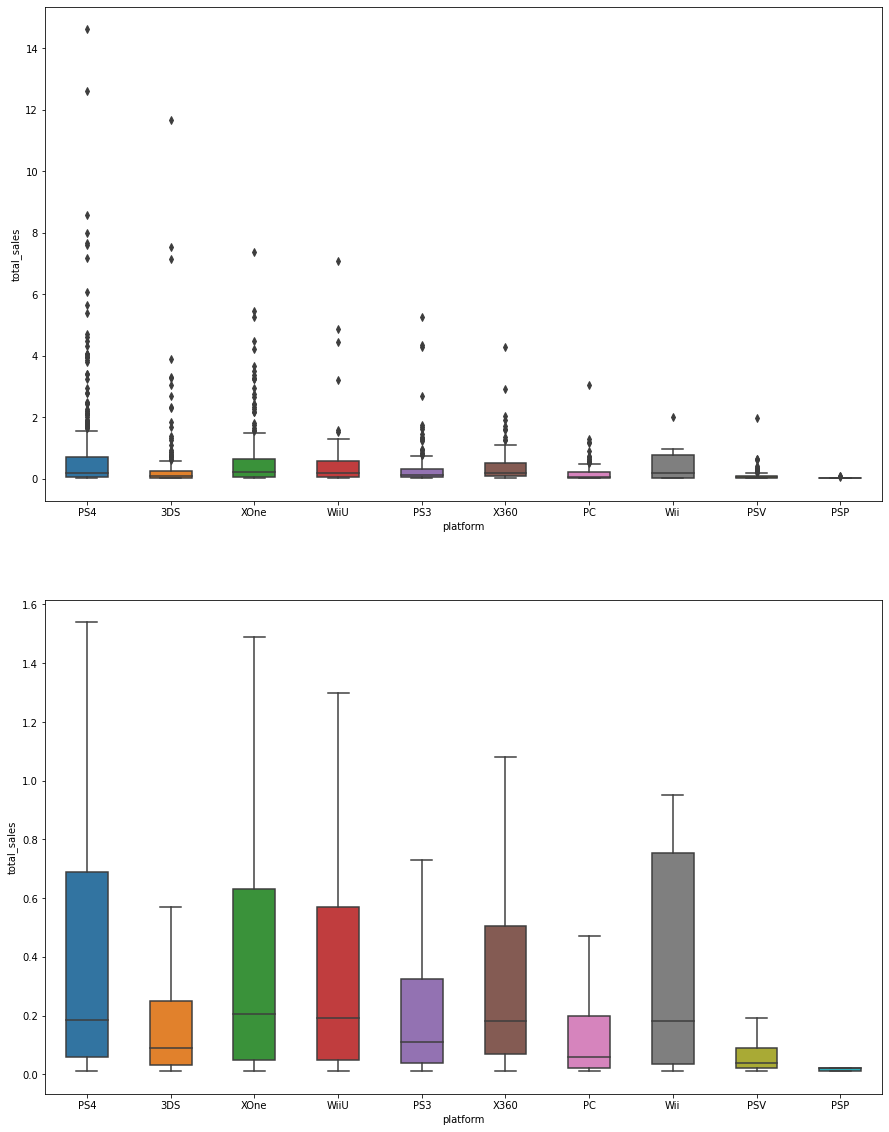

In [56]:
fig, ax = plt.subplots(2, figsize=(15, 20))
sns.boxplot(x='platform', y='total_sales', data=actual_games, width = 0.5, ax=ax[0])

sns.boxplot(x='platform', y='total_sales', data=actual_games, width = 0.5, ax=ax[1], showfliers=False)
ax[1]

plt.show()

In [69]:
pivot = actual_games.pivot_table(index='platform', values='total_sales', aggfunc=['count', 'sum', 'mean', 'median'])
pivot.columns = ['count', 'sum', 'mean', 'median']    
pivot.sort_values(by = 'median')


,count,sum,mean,median
platform,,,,
PSP,13,0.36,0.027692,0.020
PSV,295,22.40,0.075932,0.040
PC,151,27.05,0.179139,0.060
3DS,212,86.68,0.408868,0.090
PS3,219,68.18,0.311324,0.110
Wii,11,5.07,0.460909,0.180
X360,111,48.22,0.434414,0.180
PS4,376,288.15,0.766356,0.185
WiiU,73,42.98,0.588767,0.190


**Вывод**
- Лидеры продаж за 3 года: XOne, WiiU, PS4, X360, Wii, PS3
- Медиана по топовым платформам около 0,2 млн долларов прибыли за игру, по всем платформам 0,1 млн
- Верхняя граница предела, за которыми уже определяются аномалии, у платформы PS4 - на уровне 1,6 млн долларов.
- У всех лидеров 3 квартиль достаточно объемный, т.е. пользователи охотно тратят деньги на игры для любых консолей


### Диаграмма рассеяния и корреляция между отзывами и продажами
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесем выводы с продажами игр на других платформах.

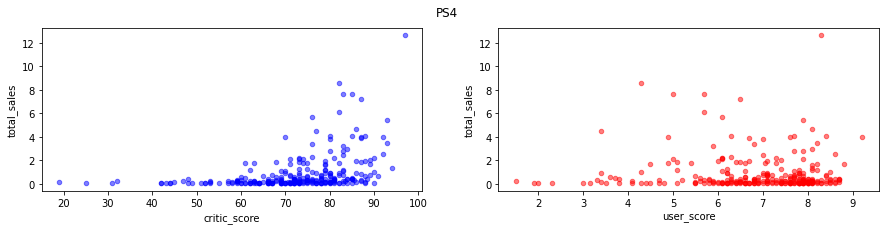

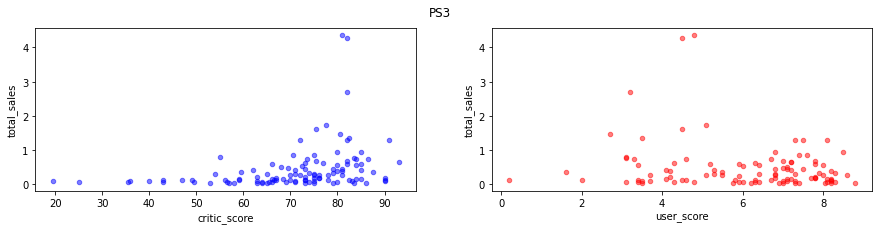

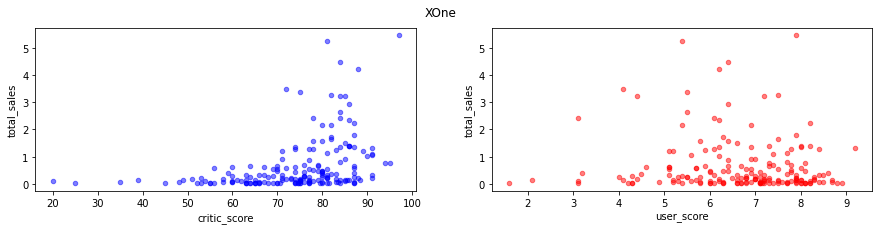

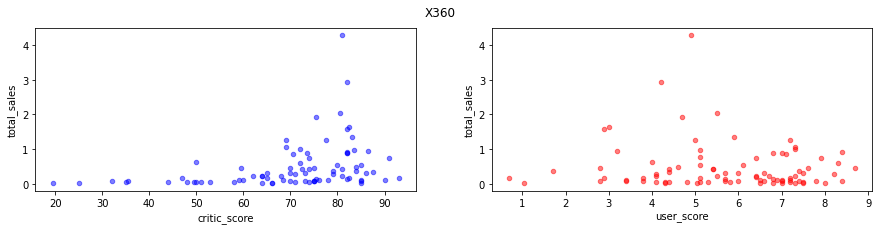

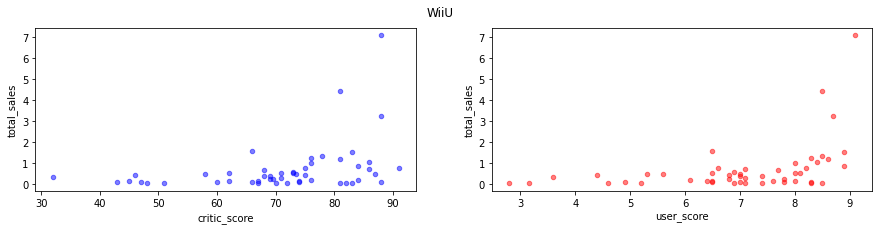

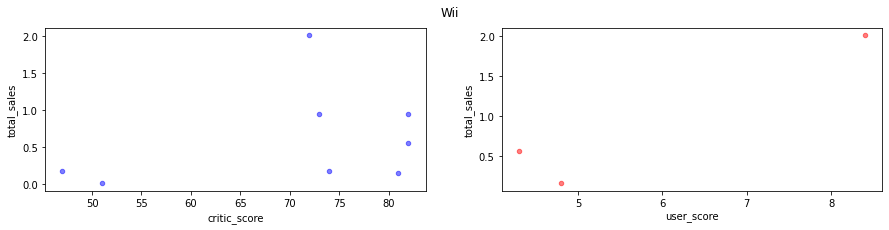

In [71]:
top_list = ['PS4', 'PS3', 'XOne', 'X360', 'WiiU', 'Wii']
for i in top_list:
    platform = actual_games.query('platform == @i')
    fig, axes = plt.subplots(1, 2, figsize=(15,3))
    platform[platform['critic_score'] != -1].plot(kind='scatter', 
                                                  x='critic_score', 
                                                  y='total_sales', 
                                                  subplots=True,
                                                  ax=axes[0],
                                                  title = i,
                                                  alpha=0.5,
                                                  c = 'b') 
    platform[platform['user_score'] != -1].plot(kind='scatter', 
                                                x='user_score', 
                                                y='total_sales', 
                                                subplots=True,
                                                ax=axes[1],
                                                title = i,
                                                alpha=0.5,
                                                c = 'r')
    plt.show()

In [72]:
top_list = ['PS4', 'PS3', 'XOne', 'X360', 'WiiU', 'Wii']

for i in top_list:
    platform = actual_games.query('platform == @i')
    corr_critic = pd.DataFrame(platform[(platform['critic_score'] != -1)][['critic_score','total_sales']].corr()['total_sales'].round(2))
    corr_user = pd.DataFrame(platform[(platform['user_score'] != -1)][['user_score','total_sales']].corr()['total_sales'].round(2))

    print(i)
    corr = pd.concat([corr_critic, corr_user], sort=False).sort_values(by='total_sales')
    display(corr.head(2))

PS4


,total_sales
user_score,-0.03
critic_score,0.38


PS3


,total_sales
user_score,-0.17
critic_score,0.30


XOne


,total_sales
user_score,-0.09
critic_score,0.38


X360


,total_sales
user_score,-0.10
critic_score,0.33


WiiU


,total_sales
critic_score,0.36
user_score,0.41


Wii


,total_sales
critic_score,0.34
user_score,0.95


**Вывод**

- Имеется слабовыраженная положительная тенденция - чем выше оценки критиков, тем больше продаж. 
- Что касается зависимости продаж от рейтинга игроков, то здесь прямой зависимости не прослеживается.
- Данные по корреляции между продажами и оценкой по платформам PS4, PS3, XOne и X360 более или менее совпадают.
- На платформах WiiU и Wii, оценка пользователей, сильнее "определяет" конечную выручку продукта, чем на других платформах. 


### Общее распределение игр по жанрам

- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

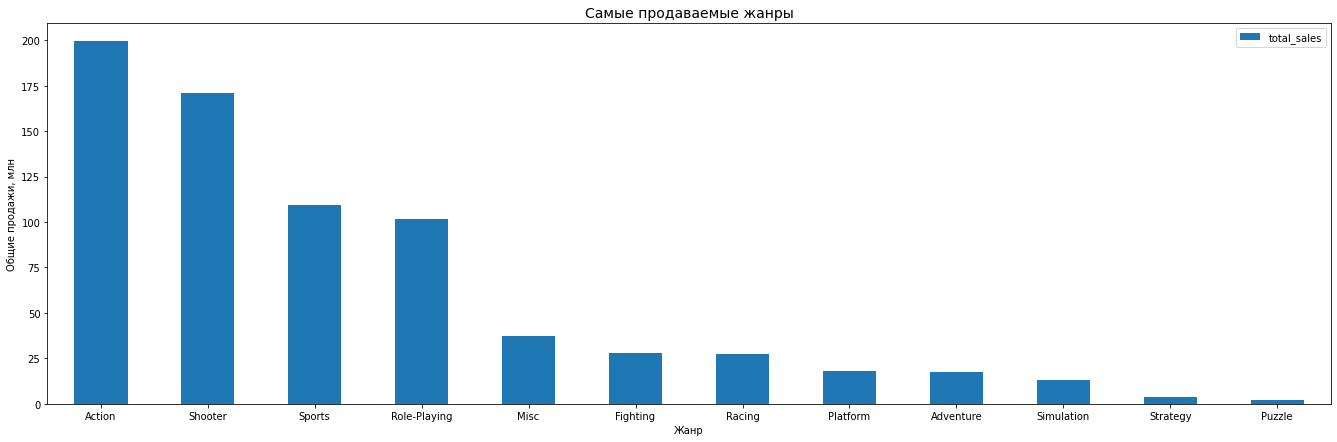

In [73]:
genre=actual_games.groupby('genre')['total_sales'].sum().reset_index()
ax=genre.sort_values(by='total_sales', ascending=False).plot(x='genre', 
                                                             y='total_sales', 
                                                             kind='bar', 
                                                             figsize=(23, 7), rot=360)
plt.title('Самые продаваемые жанры', size=14)
plt.xlabel('Жанр')
plt.ylabel('Общие продажи, млн')
plt.show()

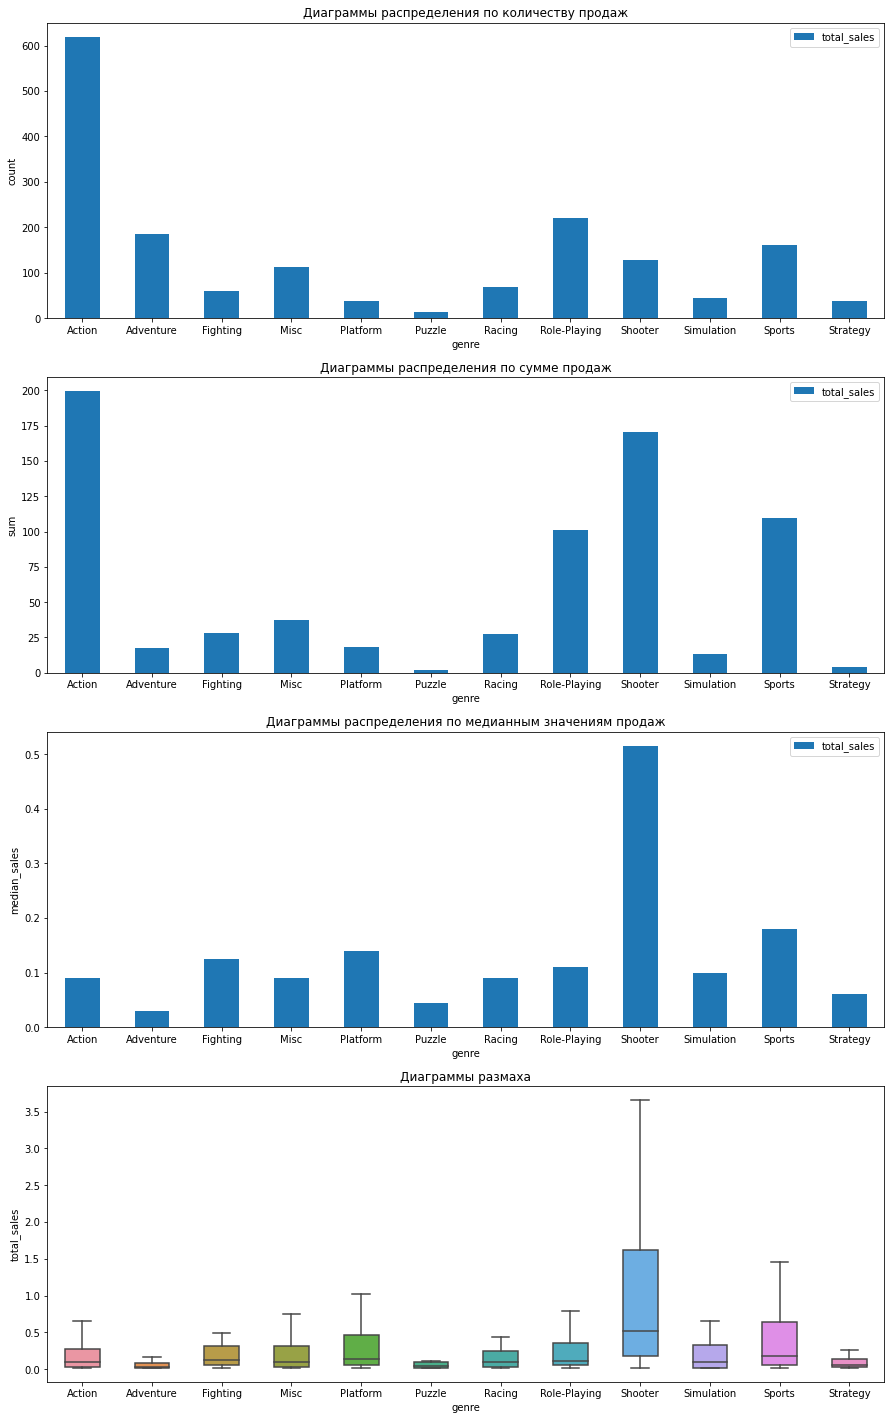

In [75]:
# построим диаграммы распределения по количеству/сумме продаж, по медианным значениям продаж и боксплот
fig, axarr = plt.subplots(4, figsize=(15, 25))

actual_games.groupby('genre')['total_sales'].count().plot.bar(
    ax=axarr[0], legend=True, ylabel='count', title='Диаграммы распределения по количеству продаж', rot=360)

actual_games.groupby('genre')['total_sales'].sum().plot.bar(
    ax=axarr[1], legend=True, ylabel='sum', title='Диаграммы распределения по сумме продаж', rot=360)

actual_games.groupby('genre')['total_sales'].median().plot.bar(
    ax=axarr[2], legend=True, ylabel='median_sales', title='Диаграммы распределения по медианным значениям продаж', rot=360)

sns.boxplot(x='genre', y='total_sales', data=actual_games.sort_values(
    by='genre', ascending=True), width = 0.5, ax=axarr[3], showfliers=False)
plt.title('Диаграммы размаха')

plt.show()

**Вывод**
- На графиках видим, что отдельные игры жанра action(боевик) продаются очень хорошо, однако в среднем большую прибыль приносят игры жанра shooter (стрелялка), также в тройке спортивные игры и платформеры, наименьший доход приносят игры в жанре приключений

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишим различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5)

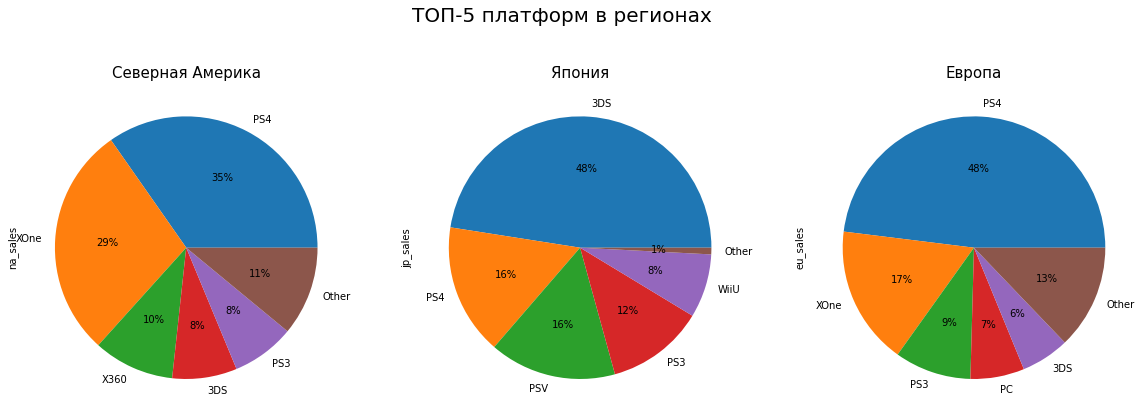

In [86]:
region = ['na_sales', 'jp_sales', 'eu_sales']
count = 0
fig, axes = plt.subplots(1, 3, figsize=(20,7))
fig.suptitle('ТОП-5 платформ в регионах', fontsize=20)
title = ['Северная Америка', 'Япония', 'Европа']
for i in region:
    #выберем 5 платформ
    df_i = (actual_games
            .groupby(by='platform')[i].sum()
            .reset_index()
            .sort_values(by=i, ascending=False, ignore_index=True)
            .head()
           )
    #все остальные запишим в other
    df_i = df_i.append({'platform': 'Other', i: actual_games[i].sum() - df_i[i].sum()}, 
                       ignore_index=True)
    
    df_i.plot(y=i, 
              kind='pie', 
              legend=False, 
              autopct='%1.0f%%', 
              subplots=True, 
              ax=axes[count],
              labels = df_i['platform'])
    axes[count].set_title(title[count], fontsize = 15)
    count += 1


**Вывод**

Самые популярные платформы по общей прибыли топ 5:
- в Северной Америке: PS4, XOne, X360, 3DS, PS3
- в Японии: 3DS, PS4, PCV, PS3, WiiU
- в Европе: PS4, XOne, PS3, PC, 3DS

максимальная доля продаж:
- в Северной Америке: Sony (PS4 + PS3) - 43% рынка, Microsoft (X360+XOne) - 39% рынка
- в Японии: Nintendo (3DS + WiiU) - 56% рынка
- в Европе: Sony (PS4 + PS3) - 57% рынка


### Самые популярные жанры (топ-5)

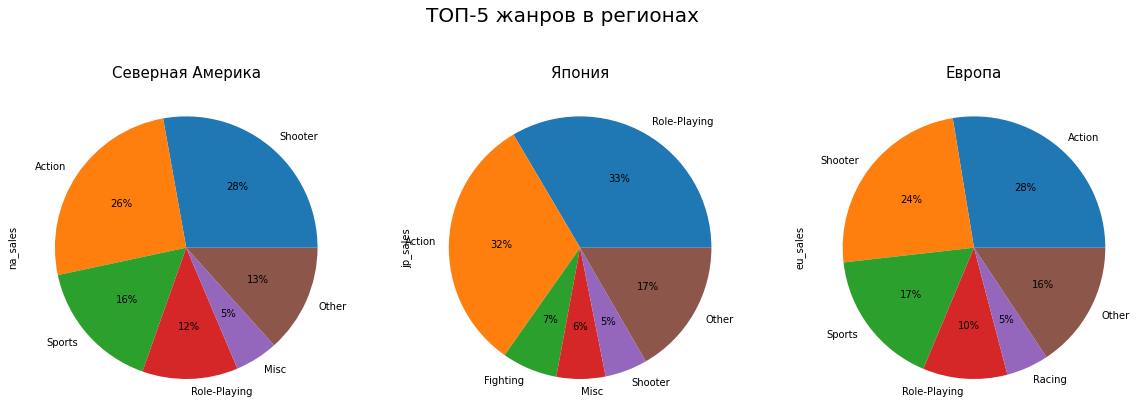

In [87]:
region = ['na_sales', 'jp_sales', 'eu_sales']
count = 0
fig, axes = plt.subplots(1, 3, figsize=(20,7))
fig.suptitle('ТОП-5 жанров в регионах', fontsize=20)
title = ['Северная Америка', 'Япония', 'Европа']
for i in region:
    #выберем 5 платформ
    df_i = (actual_games
            .groupby(by='genre')[i].sum()
            .reset_index()
            .sort_values(by=i, ascending=False, ignore_index=True)
            .head()
           )
    #все остальные запишим в other
    df_i = df_i.append({'genre': 'Other', i: actual_games[i].sum() - df_i[i].sum()}, 
                       ignore_index=True)
    
    df_i.plot(y=i, 
              kind='pie', 
              legend=False, 
              autopct='%1.0f%%', 
              subplots=True, 
              ax=axes[count],
              labels = df_i['genre'])
    axes[count].set_title(title[count], fontsize = 15)
    count += 1

**Вывод:**

Самые популярные жанры по общей прибыли топ 5:
- в Северной Америке: Shooter, Action, Sports, Role-Playing, Misc
- в Японии: Role-Playing, Action, Fighting, Misc, Shooter
- в Европе: Action, Shooter, Sports, Role-Playing, Racting

В Японии предпочитают ролевые игры и экшн

Предпочтения в Европе и Северной Америке очень схожи, больше средств тратят на экшен и шутер.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

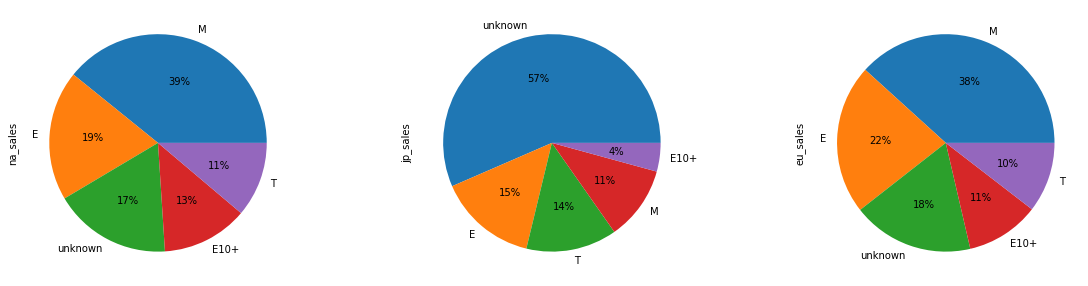

In [48]:
count = 0
fig, axes = plt.subplots(1, 3, figsize=(20,5))
for i in region:
    (actual_games
     .groupby(by='rating')
     .agg({i:'sum'})
     .sort_values(by=i, ascending=False)
     .plot(y=i, kind='pie', legend=False, autopct='%1.0f%%', subplots=True, ax=axes[count],)
    )
    count += 1

 **Вывод:**

- большую долю продаж в Америке и Европе мы наблюдаем для игр с рейтингом М, наименьшие продажи у игр с рейтингом Т и Е10+
- в Японии много игр без рейтинга из-за того, что у них есть своё рейтинговое агенство.

## Проверим гипотезы

- Зададим пороговое значение alpha
- Поясним:
    - Как сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Для проверки того, что "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" выдвинем гипотезы:

- Н0 - средние пользовательские рейтинги платформ Xbox One и PC совпадают
- Н1 - средние пользовательские рейтинги платформ Xbox One и PC не совпадают
- Критический уровень значимости зададим равным 0,05

Поскольку необходима проверка гипотезы о равенстве среднего двух независимых совокупностей по взятым из них выборкам - применим метод scipy.stats.ttest_ind(), добавим условие на неравенство дисперсий. 

In [49]:
xone = actual_games.query('platform == "XOne" and user_score > 0')
pc = actual_games.query('platform == "PC" and user_score > 0')

In [50]:
results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var = False)
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.32871997467517244
Не получилось отвергнуть нулевую гипотезу


Значение p-value говорит о том, что вероятность случайно получить различия больше 32%. Это достаточно большая вероятность, чтобы судить о значимом различии средних. Поэтому нулевая гипотеза не отвергается. Можно судить о равенстве средних пользовательских рейтингов платформ XOne и PC.

Значит, гипотеза №1 нашла свое подтверждение.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки того, что "Средние пользовательские рейтинги жанров Action и Sports разные" выдвинем гипотезы:

- Н0 - средние пользовательские рейтинги жанров Action и Sports совпадают
- Н1 - средние пользовательские рейтинги жанров Action и Sports не совпадают
- Критический уровень значимости - 0,05

Поскольку необходима проверка гипотезы о равенстве среднего двух независимых совокупностей по взятым из них выборкам - применим метод scipy.stats.ttest_ind(), добавим условие на неравенство дисперсий. 

In [51]:
action = actual_games.query('genre == "Action" and user_score > 0')
sports = actual_games.query('genre == "Sports" and user_score > 0')

In [52]:
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.54986462593763e-21
Отвергаем нулевую гипотезу


Маленькое p-value говорит, что вероятность случайного совпадения средних наших выборок ничтожно мало - мы отвергаем гипотeзу Н0. Таким образом, принимаем альтернативную гипотезу Н1 о неравенстве средних пользовательских рейтингов жанров Action и Sports.

Значит, гипотеза подтвердилась.

**Вывод:**

Каджая из выдвинутых гипотез нашла своего подтверждения, а значит:
- средние пользовательские рейтинги платформ Xbox One и PC совпадают;
- средние пользовательские рейтинги жанров Action и Sports не совпадают.

## Общий вывод

**Обзор данных:** 
- Источник Интернет-магазин «Стримчик»
- В таблице 11 столбцов и 16715 строк
- Срез данных с 1980 по 2016г.
- Датафрейм содержит названия игр, оценки пользователей и экспертов, жанры и платформы
- Продажи трех регионов: Северная Америка, Европа, Япония
- Обнаружили пропуски в 6 столбцах


**Предобработка данных** 
- Привели к нижнему регистру название столбцов
- Удалили 271 строки с пропусками в столбцах: `name`, `year_of_release`, `genre`. Это около 1.6% от всех данных
- Изменили тип данных `year_of_release` на `int`
- Заполнили пропуски в `rating` на `unknown`
- В `user_score` значение tbd изменили на маркер `-1`,
- Изменили тип данных `user_score` на `float`
- Заполнили пропуски в  `critic_score`, `user_score` медианой по конкретной игре, если это игра встречается более 2-х раз
- Остальные пропуски в `critic_score`, `user_score` заполнили маркером `-1`
- Посчитали суммарные продажи во всех регионах


**Исследовательский анализ данных**

- 80-ые — зарождение игровой индустрии
- с 95-года — активный рост
- в 2008 г — пик по количеству продаж
- с 2010 года — спад, насыщение рынка, переход на мобильные платформы
- в среднем консоль живет около 10 лет, пик продаж приходиться на 4-6 год
- выделили актуальный период с 2014 по 2016 год (з года)
- в дальнейшем исследовании не учитывали в работе данные за предыдущие годы
- выявили топ 6 потенциально прибыльных платформ на 2017 г.: PS4, XOne, 3DS, PSV, PC, WiiU
- на убыль идут приставки предыдущего поколения PS3, X360, Wii
- лидеры продаж за 3 года: XOne, WiiU, PS4, X360, Wii, PS3
- медиана по топовым платформам около 0,2 млн долларов прибыли за игру, по всем платформам 0,1 млн
- верхняя граница предела, за которыми уже определяются аномалии, у платформы PS4 - на уровне 1,6 млн долларов.
- у всех лидеров 3 квартиль достаточно объемный, т.е. пользователи охотно тратят деньги на игры для любых консолей
- имеется слабо выраженная положительная тенденция - чем выше оценки критиков, тем больше продаж
- прямой зависимости продаж от рейтинга игроков не прослеживается
- данные по корреляции между продажами и оценкой по платформам PS4, PS3, XOne и X360 более или менее совпадают.
- на платформах WiiU и Wii оценка игроков, сильнее "определяет" конечную выручку, чем на других платформах.
- игры жанра action(боевик) продаются очень хорошо, однако в среднем большую прибыль приносят игры жанра shooter (стрелялки), также в тройке sports и platform
- наименьший доход приносят игры в жанре приключений



**Портрет пользователя каждого региона**

Самые популярные платформы по общей прибыли топ 5:

- в Северной Америке: PS4, XOne, X360, 3DS, PS3
- в Японии: 3DS, PS4, PCV, PS3, WiiU
- в Европе: PS4, XOne, PS3, PC, 3DS

Максимальная доля продаж:

- в Северной Америке: Sony (PS4 + PS3) - 43% рынка, Microsoft (X360+XOne) - 39% рынка
- в Японии: Nintendo (3DS + WiiU) - 56% рынка
- в Европе: Sony (PS4 + PS3) - 57% рынка

Самые популярные жанры по общей прибыли топ 5:
- в Северной Америке: Shooter, Action, Sports, Role-Playing, Misc
- в Японии: Role-Playing, Action, Fighting, Misc, Shooter
- в Европе: Action, Shooter, Sports, Role-Playing, Racting

В Японии предпочитают ролевые игры и экшн

Предпочтения в Европе и Северной Америке очень схожи, больше средств тратят на экшен и шутер.

Большую долю продаж в Америке и Европе мы наблюдаем для игр с рейтингом М, наименьшие продажи у игр с рейтингом Т и Е10+

В Японии много игр без рейтинга из-за того, что у них есть своё рейтинговое агенство.

**Проверка гипотез**
- средние пользовательские рейтинги платформ Xbox One и PC совпадают;
- средние пользовательские рейтинги жанров Action и Sports не совпадают.


**Резюме**
- Наиболее перспективной платформой на 2017 год является PS4 и XOne - для NA, EU, в JP также стоит обратить внимание на 3DS, т.к. они лучше продаются
- Не стоит принимать решение на основе рейтинга игроков, поскольку зависимости продаж от оценок не прослеживается
- Имеет смысл обращать внимание на оценки критиков
- На рынке NA стоит обратить внимание на шутеры и экшн. Аналогично на рынке EU. На рынке JP стоит обратить внимание на ролевые игры
- Касаемо рейтинга ESRB для NA и EU рынка стоит обратить внимание на игры М, для JP стоит рассмотреть свои рейтинги
